# Intro
I decided to look at the safety factor in determining the best neighborhood in Pittsburgh.  This was done using a dataset that looked at the amount of arrests in each neighborhood.  I believe that the less arrests, the better environment it is in terms of safety, making it a good choice to live in.  To do this I was able to take the amount of arrests and compare them with the amount in each neighborhood.  The neighborhoods with the lowest arrest totals are the ones that are the most safe.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data_set = pd.read_csv('https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f')

data_set.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [6]:
select_columns = data_set[['INCIDENTNEIGHBORHOOD']]
select_columns.head()

,INCIDENTNEIGHBORHOOD
0,Bloomfield
1,Outside City
2,Westwood
3,East Allegheny
4,Crafton Heights


In [11]:
neighborhood_counts = data_set['INCIDENTNEIGHBORHOOD'].value_counts()

print(neighborhood_counts)

Central Business District    4306
South Side Flats             3410
Carrick                      2317
East Allegheny               2172
Homewood South               2064
                             ... 
Ridgemont                      37
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64


In [12]:
neighborhood_counts = data_set['INCIDENTNEIGHBORHOOD'].value_counts()

print(neighborhood_counts.head(10))

Central Business District    4306
South Side Flats             3410
Carrick                      2317
East Allegheny               2172
Homewood South               2064
Homewood North               1941
East Liberty                 1866
Marshall-Shadeland           1502
Bluff                        1471
Mount Washington             1420
Name: INCIDENTNEIGHBORHOOD, dtype: int64


Looked at the neighborhoods with the most arrests, just to see what I was working with.

In [13]:
neighborhood_counts = data_set['INCIDENTNEIGHBORHOOD'].value_counts()
bottom_10_neighborhoods = neighborhood_counts.nsmallest(10)
print(bottom_10_neighborhoods)


Mt. Oliver Neighborhood     2
Troy Hill-Herrs Island      6
Mt. Oliver Boro            18
Central Northside          23
Regent Square              37
Ridgemont                  37
New Homestead              39
Swisshelm Park             42
Chartiers City             46
East Carnegie              48
Name: INCIDENTNEIGHBORHOOD, dtype: int64


Organized the output by the 10 neighborhoods with the least arrests.

In [15]:
neighborhood_counts = data_set['INCIDENTNEIGHBORHOOD'].value_counts()
bottom_50_neighborhoods = neighborhood_counts.nsmallest(50)
print(bottom_50_neighborhoods)

Mt. Oliver Neighborhood          2
Troy Hill-Herrs Island           6
Mt. Oliver Boro                 18
Central Northside               23
Regent Square                   37
Ridgemont                       37
New Homestead                   39
Swisshelm Park                  42
Chartiers City                  46
East Carnegie                   48
St. Clair                       54
Outside County                  56
Outside State                   64
Summer Hill                     75
Oakwood                         80
Golden Triangle/Civic Arena     83
Hays                           118
Fairywood                      122
Mount Oliver                   123
Windgap                        123
Allegheny West                 127
Arlington Heights              153
Polish Hill                    162
Glen Hazel                     164
Friendship                     172
Morningside                    185
Duquesne Heights               187
Upper Lawrenceville            188
Esplen              

Noticed that none of the neighborhoods from the other metrics were represented in the bottom 10, so I increased it to the bottom 50 to look for when the first overlapping neighborhood.

In [19]:
neighborhood_counts = data_set['INCIDENTNEIGHBORHOOD'].value_counts()
neighborhoods_at_least_100 = neighborhood_counts[neighborhood_counts >= 100]
bottom_15_neighborhoods = neighborhoods_at_least_100.nsmallest(15)
print(bottom_15_neighborhoods)

Hays                   118
Fairywood              122
Mount Oliver           123
Windgap                123
Allegheny West         127
Arlington Heights      153
Polish Hill            162
Glen Hazel             164
Friendship             172
Morningside            185
Duquesne Heights       187
Upper Lawrenceville    188
Esplen                 198
Spring Garden          216
Stanton Heights        221
Name: INCIDENTNEIGHBORHOOD, dtype: int64


I narrowed down the lowest set by those with more than 100 arrests to try and account for population.

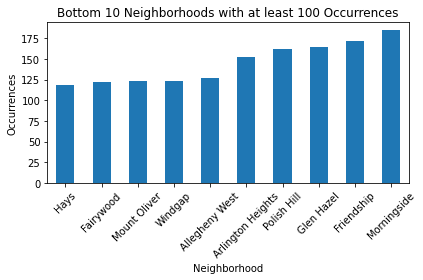

In [29]:
neighborhood_counts = data_set['INCIDENTNEIGHBORHOOD'].value_counts()
neighborhoods_at_least_100 = neighborhood_counts[neighborhood_counts >= 100]
bottom_10_neighborhoods = neighborhoods_at_least_100.nsmallest(10)
bottom_10_neighborhoods.plot(kind='bar')
plt.title('Bottom 10 Neighborhoods with at least 100 Occurrences')
plt.xlabel('Neighborhood')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Charted the bottom 10 neighborhoods with arrests >100.  When doing this Hays in the best neighborhood.

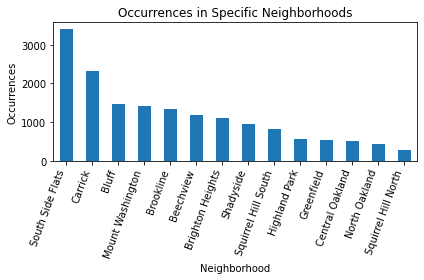

In [28]:
specific_neighborhoods = ['Squirrel Hill South', 'Brookline', 'Carrick', 'Greenfield', 'Beechview', 'Brighton Heights', 'Squirrel Hill North', 'Shadyside', 'Mount Washington', 'Highland Park', 'North Oakland', 'Central Oakland', 'Bluff', 'South Side Flats'] 

specific_neighborhood_data = data_set[data_set['INCIDENTNEIGHBORHOOD'].isin(specific_neighborhoods)]

neighborhood_counts = specific_neighborhood_data['INCIDENTNEIGHBORHOOD'].value_counts()

neighborhood_counts.plot(kind='bar')
plt.title('Occurrences in Specific Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Occurrences')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

Looked at the specfic neighborhoods from the other metrics' top 15 in order to get a better estimate of the overall best neighborhood.  When done this way, Squirrel Hill North was the best.

# Conclusion
In this dataset we are measuring the amount of arrests that happened in each neighborhood in Pittsburgh.  We first looked at the top 10 neighborhoods in terms of arrests, then the bottom 10.  Looking at the bottom ten we found that there was a couple of outliers, so we restricted it to the neighborhoods with over 100 arrests.  When looking at this we found that Hays was the best.  However, compared to the other metrics, this neighborhood as well as many others did not match up.  So, in order to better compare between metrics we took the top 10-15 neighborhoods from the other metrics and analyzed their amount of arrests.  This is where we came up with Squirrel Hill North being the best neighborhood in terms of arrests.